<a href="https://colab.research.google.com/github/tzev/LinkedIn-Project/blob/main/TradingSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
% pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=453baf5168c99c692d4adf962216ff8aa4526ed1fc9dc89ede708af7129d9243
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spy_ticker = yf.Ticker('SPY')
spy = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


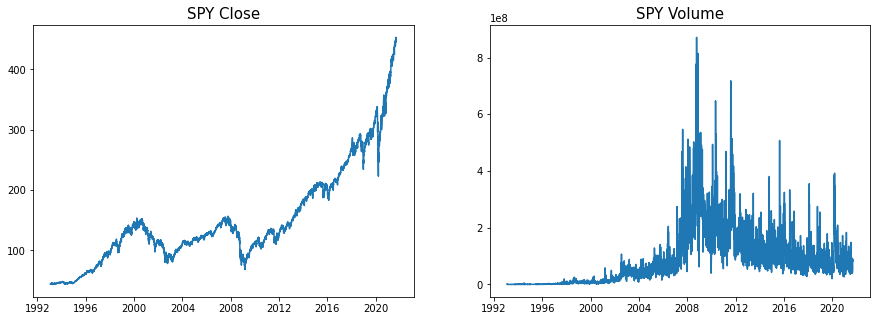

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5))
ax[0].set_title('SPY Close', fontsize=15)
ax[0].plot(spy['Close'])
ax[1].set_title('SPY Volume', fontsize=15)
ax[1].plot(spy['Volume'])

In [6]:
SMA10 = spy['Close'].rolling(window = 10).mean()
SMA20 = spy['Close'].rolling(window = 20).mean()
SMA50 = spy['Close'].rolling(window = 50).mean()
SMA100 = spy['Close'].rolling(window = 100).mean()

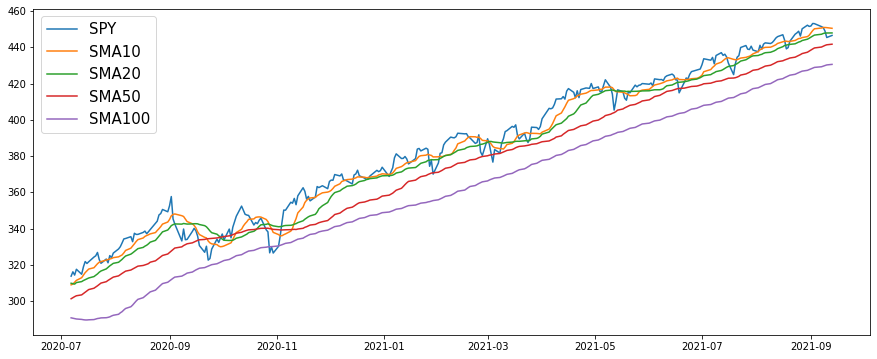

In [7]:
# taking last 300 trading days
plt.figure(figsize=(15, 6))
plt.plot(spy['Close'][-300:], label='SPY')
plt.plot(SMA10[-300:], label='SMA10')
plt.plot(SMA20[-300:], label='SMA20')
plt.plot(SMA50[-300:], label='SMA50')
plt.plot(SMA100[-300:], label='SMA100')
plt.legend(loc='upper left', fontsize=15)

In [8]:
def get_points_above(sma_low, sma_high):
    points_above = {}
    for pair in zip(sma_low, sma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index[0]
            points_above[date] = pair[0]
            
    points_above = pd.Series(points_above, name='Price_Points')
    points_above.index.name = 'Date'
            
    return points_above
points_above_SMA50 = get_points_above(SMA20, SMA50)

In [9]:
SMA20 = SMA20.reset_index()
SMA50 = SMA50.reset_index()

In [10]:
crossovers = pd.DataFrame()
crossovers['Dates'] = SMA20['Date']
crossovers['Price'] = [i for i in spy['Close']]
crossovers['SMA20'] = SMA20['Close']
crossovers['SMA50'] = SMA50['Close']
crossovers['position'] = crossovers['SMA20'] >= crossovers['SMA50']
crossovers['pre-position'] = crossovers['position'].shift(1)
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)
crossovers['Crossover'][0] = False
print(crossovers)

          Dates       Price       SMA20  ...  position  pre-position Crossover
0    1993-01-29   43.937500         NaN  ...     False           NaN     False
1    1993-02-01   44.250000         NaN  ...     False         False     False
2    1993-02-02   44.343750         NaN  ...     False         False     False
3    1993-02-03   44.812500         NaN  ...     False         False     False
4    1993-02-04   45.000000         NaN  ...     False         False     False
...         ...         ...         ...  ...       ...           ...       ...
7203 2021-09-07  451.459991  447.243498  ...      True          True     False
7204 2021-09-08  450.910004  447.654999  ...      True          True     False
7205 2021-09-09  448.980011  447.914999  ...      True          True     False
7206 2021-09-10  445.440002  447.931500  ...      True          True     False
7207 2021-09-13  446.579987  447.964499  ...      True          True     False

[7208 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
crossovers = crossovers.loc[crossovers['Crossover'] == True]
crossovers = crossovers.reset_index()
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0
for i in range(len(crossovers['SMA20'])):
    if crossovers['SMA20'][i] > crossovers['SMA50'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'
print(crossovers)

         Dates       Price       SMA20       SMA50 Signal  Binary_Signal
0   1993-04-12   44.906250   44.862500   44.687500    Buy            1.0
1   1993-04-23   43.750000   44.642187   44.680000   Sell            0.0
2   1993-05-27   45.437500   44.603125   44.599375    Buy            1.0
3   1993-07-13   44.906250   44.796875   44.818125   Sell            0.0
4   1993-08-11   45.187500   44.917187   44.908125    Buy            1.0
..         ...         ...         ...         ...    ...            ...
150 2019-09-18  301.100006  295.012003  294.935999    Buy            1.0
151 2020-03-03  300.239990  325.264503  325.374002   Sell            0.0
152 2020-04-30  290.480011  276.872002  276.395601    Buy            1.0
153 2020-09-30  334.890015  335.207004  335.222801   Sell            0.0
154 2020-10-21  342.730011  340.202003  339.851603    Buy            1.0

[155 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-pack

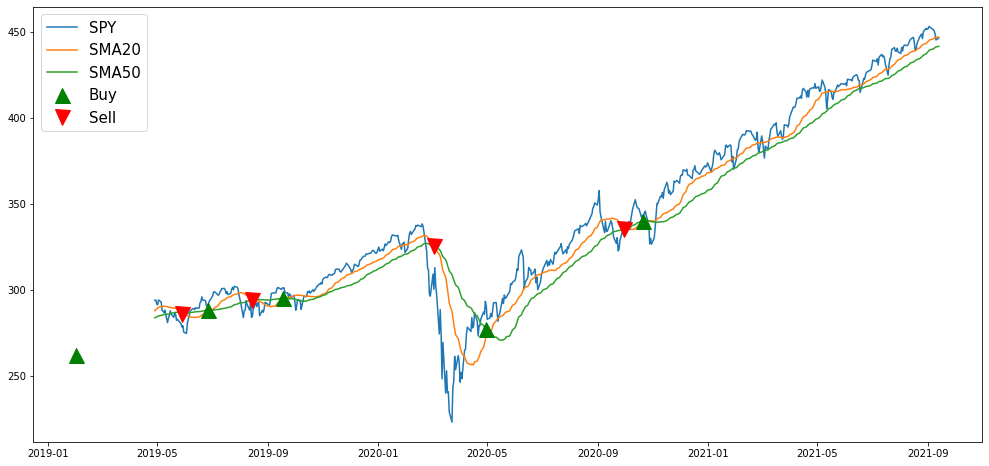

In [17]:
# taking last 600 trading days
SMA20 = spy['Close'].rolling(window=25).mean()
SMA50 = spy['Close'].rolling(window=50).mean()
plt.figure(figsize=(17, 8))
plt.plot(spy['Close'][-600:], label='SPY')
plt.plot(SMA20[-600:], label='SMA20')
plt.plot(SMA50[-600:], label='SMA50')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['Dates'][-5:], 
         crossovers['SMA20'][crossovers.Signal == 'Buy'][-5:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['Dates'][-4:], 
         crossovers['SMA20'][crossovers.Signal == 'Sell'][-4:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)